In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ict-project-research-dataset/Survey on Contributing to Open-Source Projects (Responses) - Form Responses 1.csv


In [2]:
# Load the dataset
file_path = '/kaggle/input/ict-project-research-dataset/Survey on Contributing to Open-Source Projects (Responses) - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Clean the column names by stripping extra spaces
data.columns = data.columns.str.strip()

In [3]:
# Filter data for University of Sri Jayewardenepura
usj_data = data[data['Enter your university'] == 'University of Sri Jayewardenepura']
other_data = data[data['Enter your university'] != 'University of Sri Jayewardenepura']

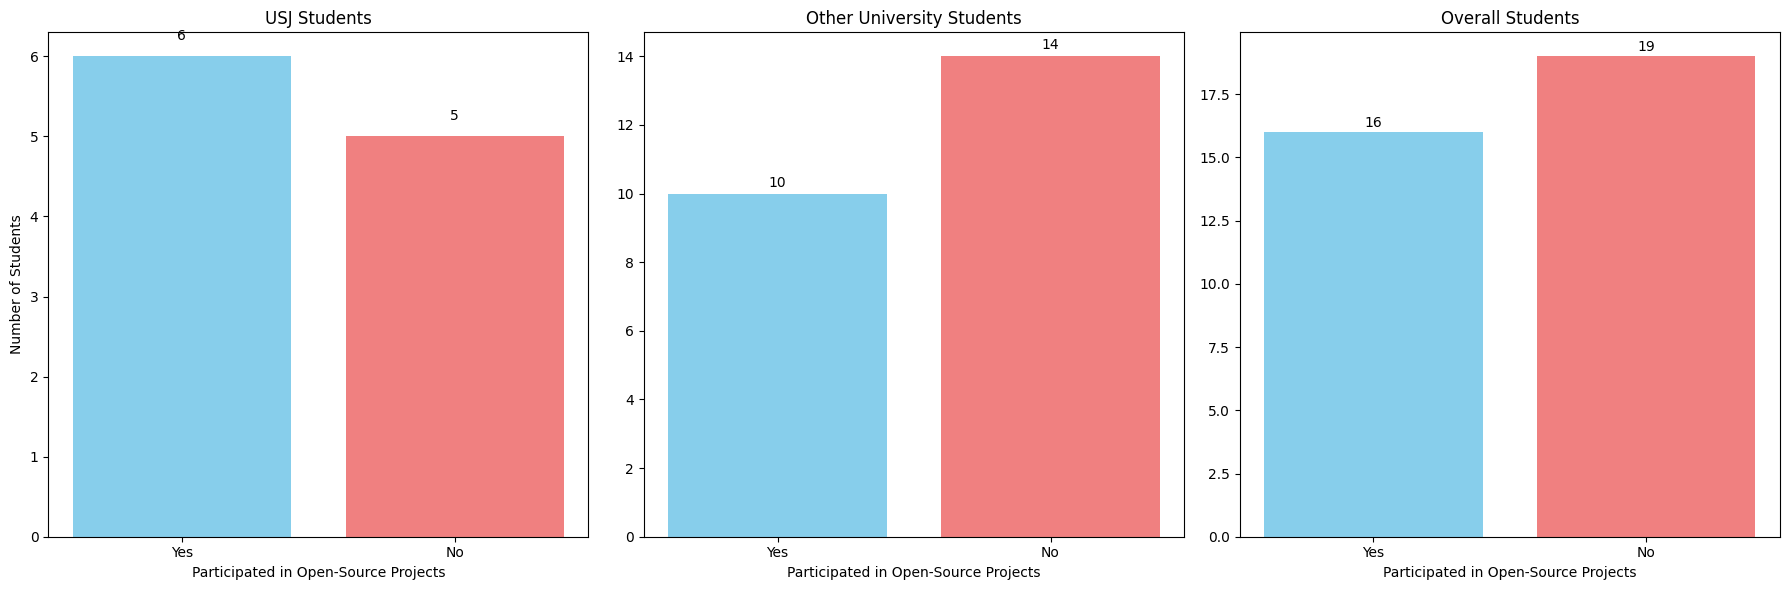

In [4]:
### participated in an open-source project USJ vs Other ###

# Calculate counts
usj_yes = len(usj_data[usj_data['Have you ever participated in an open-source project?'] == 'Yes'])
usj_no = len(usj_data[usj_data['Have you ever participated in an open-source project?'] == 'No'])

other_yes = len(other_data[other_data['Have you ever participated in an open-source project?'] == 'Yes'])
other_no = len(other_data[other_data['Have you ever participated in an open-source project?'] == 'No'])

total_yes = len(data[data['Have you ever participated in an open-source project?'] == 'Yes'])
total_no = len(data[data['Have you ever participated in an open-source project?'] == 'No'])

# Data for plotting
usj_counts = [usj_yes, usj_no]
other_counts = [other_yes, other_no]
total_counts = [total_yes, total_no]

# Plot the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# University of Sri Jayewardenepura
axes[0].bar(['Yes', 'No'], usj_counts, color=['skyblue', 'lightcoral'])
axes[0].set_title('USJ Students')
axes[0].set_xlabel('Participated in Open-Source Projects')
axes[0].set_ylabel('Number of Students')
for i, v in enumerate(usj_counts):
    axes[0].text(i, v + 0.2, str(v), ha='center')

# Other Universities
axes[1].bar(['Yes', 'No'], other_counts, color=['skyblue', 'lightcoral'])
axes[1].set_title('Other University Students')
axes[1].set_xlabel('Participated in Open-Source Projects')
for i, v in enumerate(other_counts):
    axes[1].text(i, v + 0.2, str(v), ha='center')

# Overall
axes[2].bar(['Yes', 'No'], total_counts, color=['skyblue', 'lightcoral'])
axes[2].set_title('Overall Students')
axes[2].set_xlabel('Participated in Open-Source Projects')
for i, v in enumerate(total_counts):
    axes[2].text(i, v + 0.2, str(v), ha='center')

plt.tight_layout()
plt.savefig('/kaggle/working/participated_in_an_open_source_project.png')
plt.show()

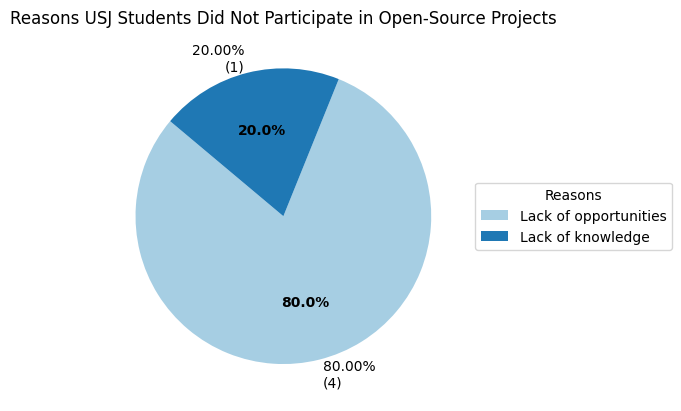

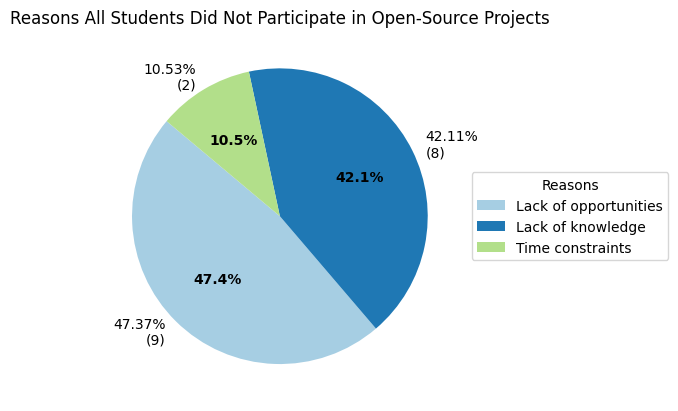

In [5]:
### Reasons Students Did Not Participate in Open-Source Projects ###

# Get reasons for USJ students
usj_reasons = usj_data[usj_data['Have you ever participated in an open-source project?'] == 'No']['If no, what has prevented you from participating?'].value_counts()

# Get reasons for all students
all_reasons = data[data['Have you ever participated in an open-source project?'] == 'No']['If no, what has prevented you from participating?'].value_counts()

# Function to plot pie chart
def plot_pie_chart(data, title):
    labels = data.index
    sizes = data.values
    total = sum(sizes)
    percentages = [f'{(s/total)*100:.2f}%\n({s})' for s in sizes]

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=percentages, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data))))

    ax.legend(wedges, labels, title="Reasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(title)
    filename = f"/kaggle/working/{title.lower().replace(' ', '_')}.png"
    plt.savefig(filename)
    plt.show()

# Plot pie charts
plot_pie_chart(usj_reasons, 'Reasons USJ Students Did Not Participate in Open-Source Projects')
plot_pie_chart(all_reasons, 'Reasons All Students Did Not Participate in Open-Source Projects')

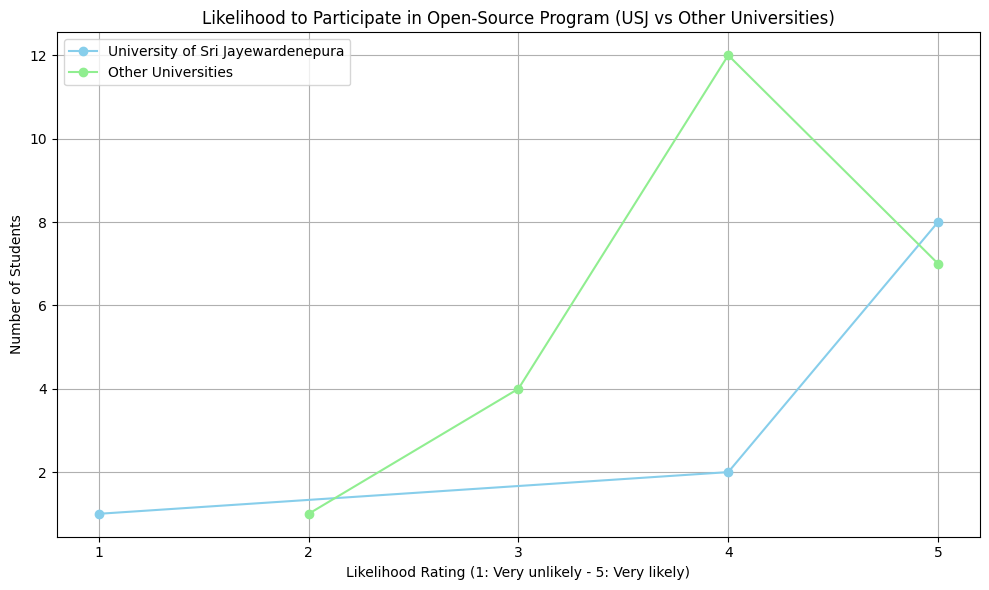

In [6]:
### Likelihood to Participate in Open-Source Program (USJ vs Other Universities) ###

# Count the likelihood ratings
usj_counts = usj_data['How likely are you to participate in a program that connects students with open-source projects if it becomes available?'].value_counts().sort_index()
other_counts = other_data['How likely are you to participate in a program that connects students with open-source projects if it becomes available?'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(usj_counts.index, usj_counts.values, marker='o', linestyle='-', color='skyblue', label='University of Sri Jayewardenepura')
plt.plot(other_counts.index, other_counts.values, marker='o', linestyle='-', color='lightgreen', label='Other Universities')

plt.xlabel('Likelihood Rating (1: Very unlikely - 5: Very likely)')
plt.ylabel('Number of Students')
plt.title('Likelihood to Participate in Open-Source Program (USJ vs Other Universities)')
plt.xticks(range(1, 6))
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('/kaggle/working/Likelihood_to_Participate_in_Open_Source_Program.png')
plt.show()

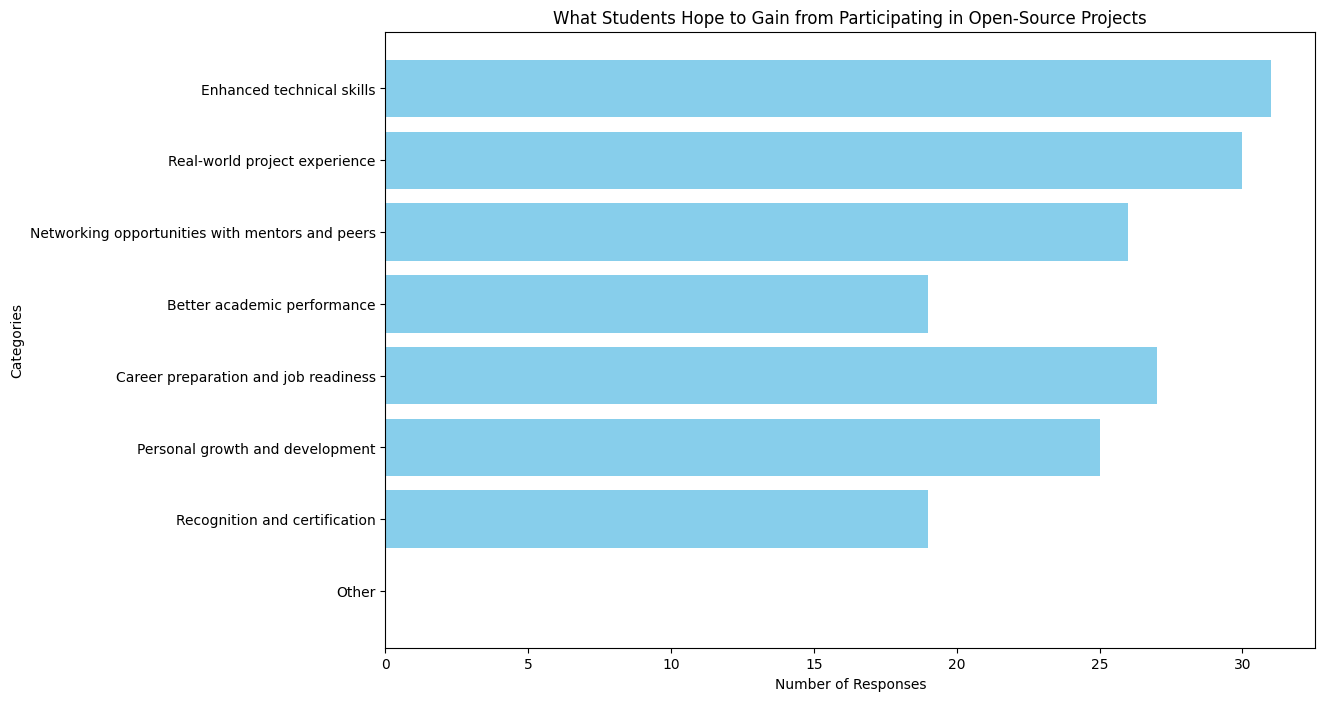

In [7]:
##### What do you hope to gain from participating in open-source projects (Select all that apply) #####

# Define the categories based on the column name
category_column = 'What do you hope to gain from participating in open-source projects (Select all that apply)'
categories = [
    'Enhanced technical skills',
    'Real-world project experience',
    'Networking opportunities with mentors and peers',
    'Better academic performance',
    'Career preparation and job readiness',
    'Personal growth and development',
    'Recognition and certification',
    'Other'
]

# Function to calculate category counts
def calculate_category_counts(df):
    category_counts = {}
    for category in categories:
        # Count non-null values in the column
        category_counts[category] = df[category_column].str.contains(category, na=False).sum()
    
    # Count responses for 'Other…'
    category_counts['Other…'] = df[category_column].str.contains('; Other', na=False).sum()

    return category_counts

# Calculate category counts for the entire dataset
category_counts = calculate_category_counts(data)

# Prepare data for plotting
counts = [category_counts[category] for category in categories]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Number of Responses')
plt.ylabel('Categories')
plt.title('What Students Hope to Gain from Participating in Open-Source Projects')
plt.gca().invert_yaxis()
plt.savefig('/kaggle/working/benifits.png')
plt.show()